In [7]:
pip install 'stable-baselines3[extra]'

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.2 MB/s eta 0:00:0000:0100:01
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 24.3 MB/s eta 0:00:00
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 98.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Actor Critic

In [2]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback

# Create the environment
env_id = "LunarLander-v2"
n_envs = 8
env = make_vec_env(env_id, n_envs=n_envs)

# Create the evaluation envs
eval_envs = make_vec_env(env_id, n_envs=5)

# Adjust evaluation interval depending on the number of envs
eval_freq = int(1e5)
eval_freq = max(eval_freq // n_envs, 1)

# Create evaluation callback to save best model
# and monitor agent performance
eval_callback = EvalCallback(
    eval_envs,
    best_model_save_path="./logs/",
    eval_freq=eval_freq,
    n_eval_episodes=10,
)


# Instantiate the agent
# Hyperparameters from https://github.com/DLR-RM/rl-baselines3-zoo
linear_schedule = lambda progress_remaining: progress_remaining * 0.00083
model = A2C(
    "MlpPolicy",
    env,
    n_steps=5,
    gamma=0.995,
    learning_rate=linear_schedule,
    ent_coef=0.00001,
    verbose=1,
)

# Train the agent (you can kill it before using ctrl+c)
try:
    model.learn(total_timesteps=int(5e5), callback=eval_callback)
except KeyboardInterrupt:
    pass

# Load best model
model = A2C.load("logs/best_model.zip")

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 102      |
|    ep_rew_mean        | -165     |
| time/                 |          |
|    fps                | 8276     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -0.156   |
|    learning_rate      | 0.000823 |
|    n_updates          | 99       |
|    policy_loss        | -11.7    |
|    value_loss         | 1.76e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 134      |
|    ep_rew_mean        | -171     |
| time/                 |          |
|    fps                | 5788     |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 8000     |
| train/             

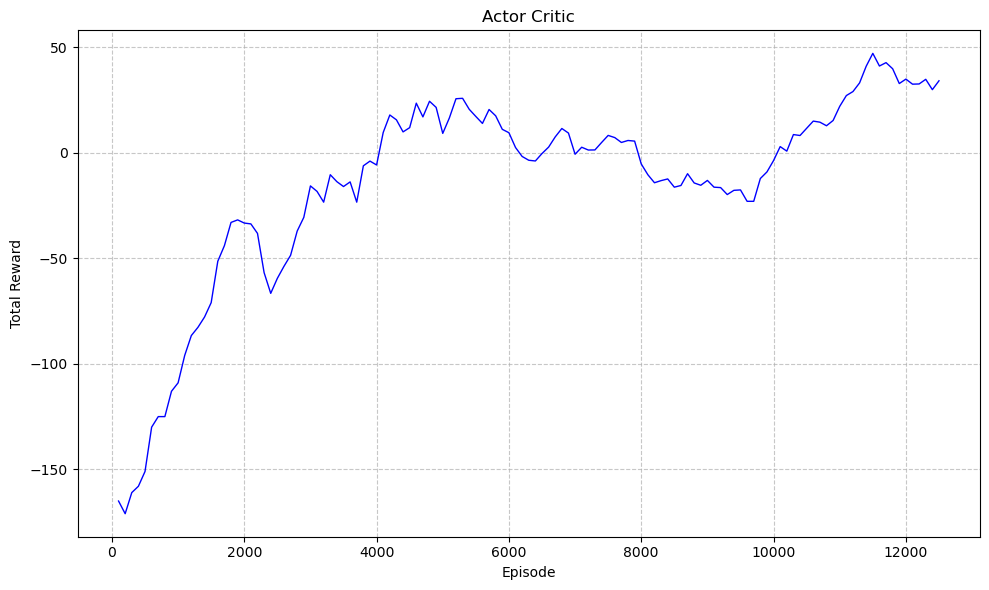

In [4]:
import matplotlib.pyplot as plt
import numpy as np  # If you need numpy, import it as np

# The rewards from your training data
rewards = [
    -165, -171, -161, -158, -151, -130, -125, -125, -113, -109,
    -96, -86.6, -82.7, -77.8, -71, -51.4, -44, -33, -31.8, -33.3,
    -33.7, -38.2, -56.8, -66.6, -59.5, -53.8, -48.6, -37.1, -30.6, -15.7,
    -18.3, -23.4, -10.4, -13.7, -16, -13.8, -23.4, -6.18, -3.95, -5.78,
    9.6, 17.9, 15.6, 9.89, 11.9, 23.5, 17, 24.4, 21.5, 9.18,
    16.5, 25.6, 25.8, 20.6, 17.2, 13.9, 20.5, 17.5, 11.1, 9.5,
    2.48, -1.75, -3.55, -3.89, -0.365, 2.68, 7.52, 11.5, 9.33, -0.696,
    2.62, 1.3, 1.34, 4.84, 8.22, 7.19, 4.88, 5.82, 5.52, -5.29,
    -10.4, -14.2, -13.2, -12.4, -16.3, -15.5, -9.92, -14.3, -15.4, -13.1,
    -16.3, -16.5, -19.8, -17.8, -17.6, -23, -23, -12.2, -9.08, -3.68,
    2.92, 0.775, 8.62, 8.18, 11.6, 15, 14.5, 12.8, 15.3, 22,
    27.1, 29, 33.1, 41, 47.1, 41.1, 42.7, 39.8, 32.8, 34.9,
    32.5, 32.6, 34.8, 29.9, 34.1
]

# Create figure and axis with specific size
plt.figure(figsize=(10, 6))

# Create x-axis values (episodes)
episodes = [(i+1)*100 for i in range(len(rewards))]

# Plot the rewards
plt.plot(episodes, rewards, 'b-', linewidth=1)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Actor Critic')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Report and Comparison

### Observations on A2C Performance for LunarLander-v2

During our experiments with A2C (Advantage Actor-Critic), we noticed the agent made steady but modest progress. By the end of training, the rewards averaged around 35, which, while showing some learning, fell well short of the ~250–300 range we observed with DQN. This gap highlighted A2C's limitations in handling the task effectively.

#### What We Observed:

**1. Slow and Inconsistent Progress:**  
The agent's rewards increased gradually but never reached optimal levels. Even with extensive training, it seemed to plateau around 35, indicating that the learning process was slower and possibly stuck. The lack of significant improvement over time suggested that A2C might have struggled to find more effective strategies.

**2. Sensitivity to Environment Complexity:**  
LunarLander-v2’s dynamics—discrete actions like firing thrusters combined with continuous motion—appeared to challenge A2C. The agent seemed to have difficulty generalizing strategies for managing the precise control needed, which may have slowed its learning compared to DQN’s more robust approach.

**3. Sparse and Delayed Rewards:**  
Rewards in LunarLander-v2 are sparse, often only coming after a successful landing or major events. A2C, which relies on shorter trajectory updates, might have been less effective at understanding the long-term impact of its actions. In contrast, DQN explicitly evaluates action values over time, giving it an edge in such environments.

**4. Fluctuations in Training Metrics:**  
Throughout training, metrics like explained variance fluctuated significantly. At times, explained variance was negative or close to zero, indicating the agent struggled to predict future rewards accurately. This instability likely interfered with A2C’s learning progress.

**5. Uncertainty in the Landing Surface:**  
The variability in the landing conditions, such as slopes or landing zones, seemed to pose additional challenges. A2C’s policy-driven updates may have made it harder to adapt quickly to these uncertainties, limiting its ability to generalize across different scenarios.

### Concluding Thoughts:  
Overall, while A2C showed moderate learning, it was clearly outperformed by DQN in this environment. The slower progress and lower rewards suggest A2C struggled with the discrete action space, environmental variability, and delayed reward structure. Future efforts might need to focus on enhancing A2C’s ability to manage these specific challenges to achieve better results.